In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [297]:
## Load Datasets ##

# Experiment #

df_oa = pd.read_csv("/home/joe/Downloads/openalex_query_results_carbon_price_title_abstract_22122022.csv")
df_s2 = pd.read_csv("/home/joe/Downloads/s2_query_results_carbon_price_title_abstract_22122022.csv")

# Controls #

df_ws = pd.read_csv("/home/joe/Downloads/wos_title_abstract.csv")
df_sp = pd.read_csv("/home/joe/Downloads/scopus_title_abstract.csv")

# Reduce Essential Columns #

df_sp = df_sp.loc[:,["DOI","Title","Year"]]
df_sp["db"] = "scopus"
df_sp["db_type"] = 'control'
df_ws = df_ws.loc[:,["DOI","Article Title","Publication Year"]]
df_ws["db"] = "web of science"
df_ws["db_type"] = 'control'

df_oa = df_oa.loc[:,["doi","title","publication_year"]]
df_oa["db"] = "open alex"
df_oa["db_type"] = 'open academic'
df_s2 = df_s2.loc[:,["doi","title","publication_year"]]
df_s2["db"] = "semantic scholar"
df_s2["db_type"] = 'open academic'

datasets = [df_oa,df_s2,df_ws,df_sp]

# Transformation #

for df in datasets:
    df.columns = ['doi','title','year',"db","db_type"]
    df["title"] = df["title"].str.replace("(\W\D)","",regex=True).str.lower()
    df["doi"] = df["doi"].str.replace("^https:\/\/doi.org\/","",regex=True)
    df["doi_missing"] = df["doi"].isnull()
    df.drop_duplicates(inplace=True)
    
df_all = pd.concat(datasets, ignore_index=True)

FileNotFoundError: [Errno 2] No such file or directory: '~/Downloads/total_results.png'

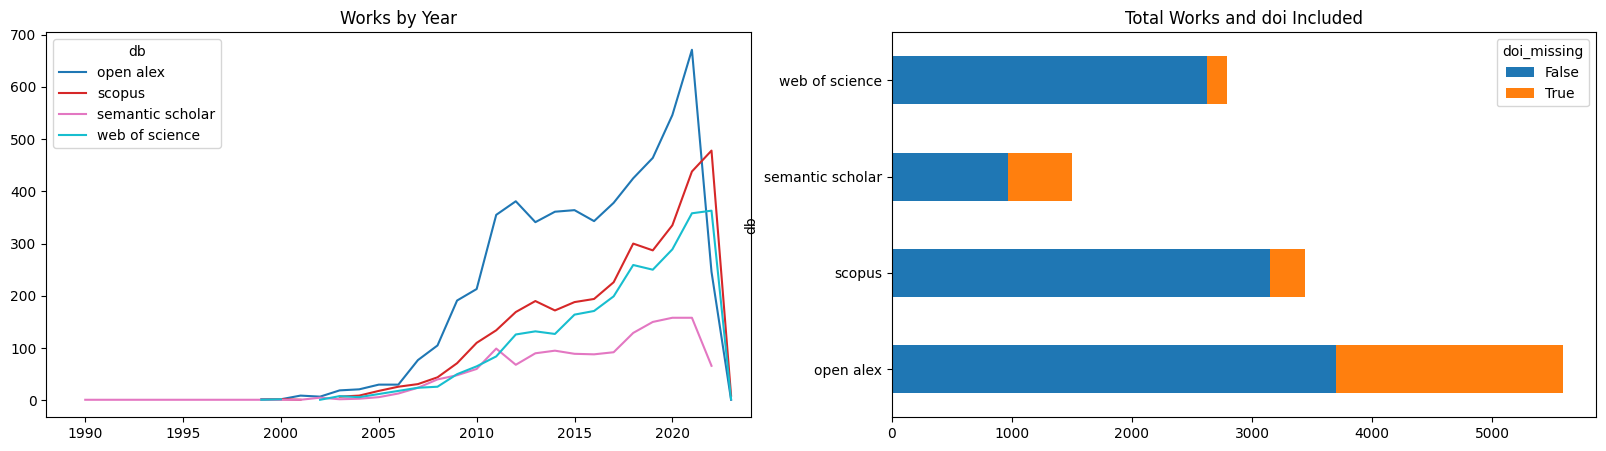

In [314]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

df_all.groupby(["db","year"]).size().reset_index(name="works")\
    .pivot(index="year",columns="db",values="works")\
    .plot(xlim=(1988,2024), ax=axes[0], title="Works by Year", colormap="tab10", xlabel="")

df_all.groupby(["db","doi_missing"]).size().reset_index(name="works")\
    .pivot(index="db",columns="doi_missing",values="works")\
    .plot(kind="barh", stacked=True, ax=axes[1], title="Total Works and doi Included")

plt.savefig("~/Downloads/total_results.png", bbox_inches="tight")

In [299]:
df_doi = df_all.loc[~df_all["doi_missing"]]\
    .groupby("doi")["db"].apply(set).apply(list).apply(sorted).apply('|'.join)\
    .reset_index()

df_title = df_all\
    .groupby("title")["db"].apply(set).apply(list).apply(sorted).apply('|'.join)\
    .reset_index()

In [300]:
df_doi.groupby("db").size()

db
open alex                                           1194
open alex|scopus                                     157
open alex|scopus|semantic scholar                     37
open alex|scopus|semantic scholar|web of science     214
open alex|scopus|web of science                     1852
open alex|semantic scholar                           203
open alex|semantic scholar|web of science              7
open alex|web of science                              32
scopus                                               352
scopus|semantic scholar                               44
scopus|semantic scholar|web of science                77
scopus|web of science                                410
semantic scholar                                     381
semantic scholar|web of science                        2
web of science                                        29
dtype: int64

In [301]:
df_title.groupby("db").size()

db
open alex                                           1942
open alex|scopus                                     285
open alex|scopus|semantic scholar                     93
open alex|scopus|semantic scholar|web of science     366
open alex|scopus|web of science                     1632
open alex|semantic scholar                           609
open alex|semantic scholar|web of science             12
open alex|web of science                              54
scopus                                               487
scopus|semantic scholar                               32
scopus|semantic scholar|web of science                70
scopus|web of science                                456
semantic scholar                                     282
semantic scholar|web of science                        3
web of science                                       196
dtype: int64

In [302]:
df_doi_types = df_all.loc[~df_all["doi_missing"]]\
    .groupby("doi")["db_type"].apply(set).apply(list).apply(sorted).apply('|'.join)\
    .reset_index()

df_doi_types["doi_match"] = df_doi_types["db_type"].str.contains("\|")

df_title_types = df_all\
    .groupby("title")["db_type"].apply(set).apply(list).apply(sorted).apply('|'.join)\
    .reset_index()

df_title_types["title_match"] = df_title_types["db_type"].str.contains("\|")

In [303]:
df_all = df_all.merge(df_doi_types.loc[:,["doi","doi_match"]], how="left", on="doi")\
                .merge(df_title_types.loc[:,["title","title_match"]], how="left", on="title")

In [309]:
df_all.groupby(["db_type","doi_match","title_match"]).size()

db_type        doi_match  title_match
control        False      False           821
                          True            381
               True       False           493
                          True           4074
open academic  False      False          1391
                          True            593
               True       False           268
                          True           2412
dtype: int64

In [292]:
df_title_types.groupby("").size()

db_type
control                  1139
control|open academic    2547
open academic            2833
dtype: int64